<a href="https://colab.research.google.com/github/ManalSaad2/portfolio1/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px


In [2]:
df = pd.read_excel("/content/Aqar_Riyadh.xlsx")

In [3]:
df.head()

,Property_ID,Property Type,Bedrooms,Bathrooms,Area,Price,Description,Location,District,City,Agency_Name
0,A877409248,دور,6,5.0,214 م2,"730,000","دور للبيع في بدر, جنوب الرياض",بدر، جنوب الرياض، الرياض,حي بدر,الرياض,NaN
1,W448904463,فیلا,5,6.0,440 م2,"4,800,000",فيلا للبيع في الملك فهد، شمال الرياض,الملك فهد، شمال الرياض، الرياض,حي الملك فهد,الرياض,NaN
2,M187516680,فیلا,11,6.0,445 م2,"5,000,000",فيلا للبيع في الوادي، شمال الرياض,الوادي، شمال الرياض، الرياض,حي الوادي,الرياض,NaN
3,H808583263,دور,6,5.0,185 م2,"1,200,000",دور للبيع في المونسية، شرق الرياض,المونسية، شرق الرياض، الرياض,حي المونسية,الرياض,NaN
4,T501925005,فیلا,6,6.0,300 م2,"980,000",فيلا للبيع في بدر، جنوب الرياض,بدر، جنوب الرياض، الرياض,حي بدر,الرياض,مؤسسة غزالة للخدمات العقارية


In [4]:
data=df[['Property Type','Price','Area','District']]

In [5]:
data.head()

,Property Type,Price,Area,District
0,دور,"730,000",214 م2,حي بدر
1,فیلا,"4,800,000",440 م2,حي الملك فهد
2,فیلا,"5,000,000",445 م2,حي الوادي
3,دور,"1,200,000",185 م2,حي المونسية
4,فیلا,"980,000",300 م2,حي بدر


In [6]:
data.describe()

,Property Type,Price,Area,District
count,1200,1200,1200,1200
unique,8,288,317,108
top,شقة,"860,000",500 م2,حي بدر
freq,395,74,94,130


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_ID    1200 non-null   object 
 1   Property Type  1200 non-null   object 
 2   Bedrooms       1132 non-null   object 
 3   Bathrooms      1129 non-null   float64
 4   Area           1200 non-null   object 
 5   Price          1200 non-null   object 
 6   Description    1200 non-null   object 
 7   Location       1200 non-null   object 
 8   District       1200 non-null   object 
 9   City           1192 non-null   object 
 10  Agency_Name    821 non-null    object 
dtypes: float64(1), object(10)
memory usage: 103.3+ KB


In [8]:
data.isnull().sum()

,0
Property Type,0
Price,0
Area,0
District,0


In [9]:
data.duplicated().sum()

np.int64(357)

In [10]:
data.drop_duplicates(inplace=True)

<ipython-input-10-515f69ef7765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [12]:
data["Price"] = data["Price"].astype(str).str.replace(',', '', regex=True).astype(int)


data["Area"] = data["Area"].astype(str).str.replace(',', '', regex=True)
data["Area"] = data["Area"].str.extract('(\d+)').astype(float)


data["Average price per square meter"] = data["Price"] / data["Area"]

<ipython-input-12-8a59b7439393>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Price"] = data["Price"].astype(str).str.replace(',', '', regex=True).astype(int)
<ipython-input-12-8a59b7439393>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Area"] = data["Area"].astype(str).str.replace(',', '', regex=True)
<ipython-input-12-8a59b7439393>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [13]:
data

,Property Type,Price,Area,District,Average price per square meter
0,دور,730000,214.0,حي بدر,3411.214953
1,فیلا,4800000,440.0,حي الملك فهد,10909.090909
2,فیلا,5000000,445.0,حي الوادي,11235.955056
3,دور,1200000,185.0,حي المونسية,6486.486486
4,فیلا,980000,300.0,حي بدر,3266.666667
...,...,...,...,...,...
1190,شقة,440000,166.0,حي بدر,2650.602410
1193,فیلا,2800000,437.0,حي المونسية,6407.322654
1194,دور,1700000,301.0,حي المونسية,5647.840532
1196,فیلا,4400000,496.0,حي المونسية,8870.967742


In [14]:
plt.figure(figsize=(15,7))
px.scatter(data,x="Property Type",y="Price",color="District")

<Figure size 1500x700 with 0 Axes>

In [15]:
px.pie(data,names="Property Type",values="Price")

<Axes: xlabel='Property Type'>

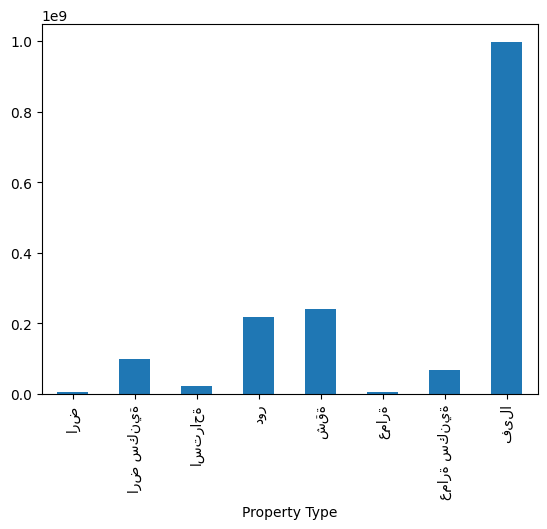

In [16]:
data.groupby("Property Type")["Price"].sum().plot(kind="bar")

In [17]:
data.groupby("Property Type")["Price"].sum().sort_values()

,Price
Property Type,
عمارة,4300000
ارض,4651200
استراحة,22240000
عمارة سكنية,67698000
ارض سكنية,97726355
دور,217573399
شقة,241873021
فیلا,997551985


In [18]:
data.groupby("District")["Price"].sum().sort_values()

,Price
District,
حي العلا,535
حي الشعلة,550
حي المرسلات,10000
حي المرقب,280000
حي المروة,360000
...,...
حي المهدية,85284000
حي الرمال,92265920
حي الملقا,96020000
